# Chapter 02 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. 
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import matplotlib.pyplot as plt

# Coin toss experiment

In [3]:
import random
from collections import Counter

# set random seed for reproducibility (you can use any number)
random.seed(123)

coin = ["H", "T"]

# one trial: simulate 10 coin tosses and count number of heads and tails
trial = random.choices(coin, k=10)
counts = Counter(trial)
print(counts)

# keep track of numbers of heads
nr_heads = [counts["H"]]

Counter({'H': 7, 'T': 3})


In [4]:
# repeat trial 11 more times
for _ in range(11):
    trial = random.choices(coin, k=10)
    counts = Counter(trial)
    print(counts)
    nr_heads.append(counts["H"])

Counter({'H': 9, 'T': 1})
Counter({'T': 6, 'H': 4})
Counter({'T': 6, 'H': 4})
Counter({'T': 6, 'H': 4})
Counter({'H': 6, 'T': 4})
Counter({'H': 5, 'T': 5})
Counter({'T': 5, 'H': 5})
Counter({'H': 10})
Counter({'H': 7, 'T': 3})
Counter({'T': 6, 'H': 4})
Counter({'T': 6, 'H': 4})


In [5]:
# repeat trial 100 more times
for _ in range(100):
    trial = random.choices(coin, k=10)
    counts = Counter(trial)
    nr_heads.append(counts["H"])
seven_or_more = sum(n >= 7 for n in nr_heads)
print(f"Seven or more heads occurred in {seven_or_more} trials")

Seven or more heads occurred in 24 trials


 Create the visualization for the results of three coin tosses

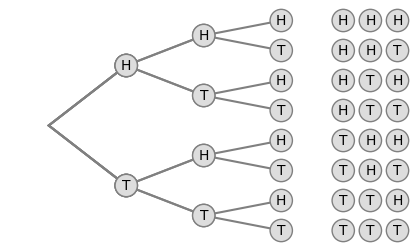

In [6]:
import matplotlib.pyplot as plt
import itertools

# create all possible combinations of coin toss results (1, 1, 1), (1, 1, -1), ...
flip_results = list(itertools.product([-1, 1], repeat=3))

# y-positions at which coins are to be drawn
shifts = [4, 2, 1]
fig, ax = plt.subplots(figsize=[5, 3])
props = {'facecolor': '#dddddd', 'edgecolor': 'grey', 'boxstyle': 'circle'}
centered_circle = {"verticalalignment": "center", "horizontalalignment": "center",
                "bbox": {"facecolor": "#dddddd", "edgecolor": "grey", "boxstyle": "circle"}}
for flip_result in flip_results:
    # determine y positions for the coins in the tree and draw lines
    deltas = [0]
    for direction, shift in zip(flip_result, shifts):
        deltas.append(deltas[-1] + direction * shift)
    ax.plot([0, 1, 2, 3], deltas, color='grey')
    # add the coins along the tree lines
    faces = ['H' if c == 1 else 'T' for c in flip_result]
    for x, y, face in zip([1, 2, 3], deltas[1:], faces):
        ax.text(x, y, face, **centered_circle)
    # add the resulting coin combination on the right
    for x, y, face in zip([3.8, 4.15, 4.5], [deltas[-1]]*3, faces):
        ax.text(x, y, face, **centered_circle)
ax.set_xlim(-0.5, 4.5)
plt.axis("off")  # hide the axis
plt.show()

# Proportion of heads as a function of coin tosses

In [7]:
import pandas as pd
nr_of_tosses = 0
nr_of_heads = 0
results = []
for increment in [10, 100, 1000]:
    for _ in range(10 if increment == 10 else 9):
        tosses = random.choices(coin, k=increment)
        nr_of_tosses += len(tosses)
        nr_of_heads += sum(toss == "H" for toss in tosses)
        results.append({"tosses": nr_of_tosses, "heads": nr_of_heads})
df = pd.DataFrame(results)
df["proportion"] = df["heads"] / df["tosses"]
df

,tosses,heads,proportion
0,10,5,0.500000
1,20,8,0.400000
2,30,14,0.466667
3,40,17,0.425000
4,50,21,0.420000
5,60,26,0.433333
6,70,31,0.442857
7,80,37,0.462500
8,90,43,0.477778
9,100,47,0.470000


 Visualize the results

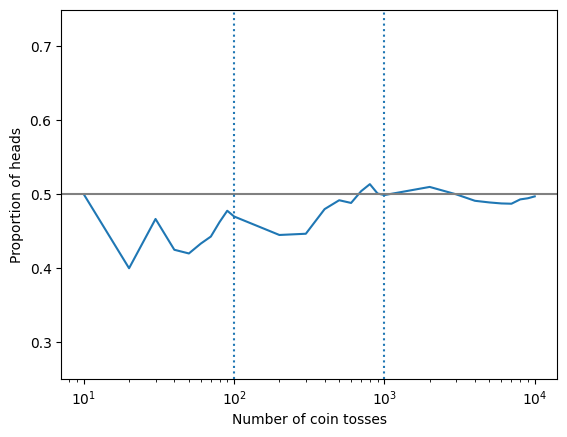

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot(x="tosses", y="proportion", legend=False, ax=ax)
ax.set_xscale("log")
ax.set_ylim(0.25, 0.75)
ax.axhline(0.5, color="grey")
ax.axvline(100, linestyle=":")
ax.axvline(1000, linestyle=":")
ax.set_xlabel("Number of coin tosses")
ax.set_ylabel("Proportion of heads")

plt.show()